<h1 align='center' style="margin-bottom: 0px"> An end to end implementation of a Machine Learning pipeline </h1>
<h4 align='center' style="margin-top: 0px"> SPANDAN MADAN</h4>
<h4 align='center' style="margin-top: 0px"> Visual Computing Group, Harvard University</h4>
<h4 align='center' style="margin-top: 0px"> Computer Science and Artificial Intelligence Laboratory, MIT</h4>

<h2 align='center' style="margin-top: 0px"><a href='https://github.com/Spandan-Madan/DeepLearningProject'>Link to Github Repo</a></h2>

# Section 1. Introduction

### Background
In the fall of 2016, I was a Teaching Fellow (Harvard's version of TA) for the graduate class on "Advanced Topics in Data Science (CS209/109)" at Harvard University. I was in-charge of designing the class project given to the students, and this tutorial has been built on top of the project I designed for the class.

### Why write yet another Tutorial on Machine Learning and Deep Learning?
As a researcher on Computer Vision, I come across new blogs and tutorials on ML (Machine Learning) every day. However, most of them are just focussing on introducing the syntax and the terminology relavant to the field. For example - a 15 minute tutorial on Tensorflow using MNIST dataset, or a 10 minute intro to Deep Learning in Keras on Imagenet. 

While people are able to copy paste and run the code in these tutorials and feel that working in ML is really not that hard, it doesn't help them at all in using ML for their own purposes. For example, they never introduce you to how you can run the same algorithm on your own dataset. Or, how do you get the dataset if you want to solve a problem. Or, which algorithms do you use - Conventional ML, or Deep Learning? How do you evaluate your models performance? How do you write your own model, as opposed to choosing a ready made architecture? All these form fundamental steps in any Machine Learning pipeline, and it is these steps that take most of our time as ML practitioners. 

This tutorial breaks down the whole pipeline, and leads the reader through it step by step in an hope to empower you to actually use ML, and not just feel that it was not too hard. Needless to say, this will take much longer than 15-30 minutes. I believe a weekend would be a good enough estimate.

### About the Author

I am <a href="http://spandanmadan.com/">Spandan Madan</a>, a graduate student at Harvard University working on Computer Vision. My research work is supervised collaboratively by Professor Hanspeter Pfister at Harvard, and Professor Aude Oliva at MIT. My current research focusses on using Computer Vision and Natural Language Techniques in tandem for automated understanding of Infographics. Infographics like posters, visualizations and graphic designs often contain both textual and pictographic components and are designed by experts to convey a message or a story. In studying these images, we hope to develop systems capable of reasoning using text and visual elements simultaneously.

# Section 2. Project Outline : Multi-Modal Genre Classification for Movies 

## Wow, that title sounds like a handful, right? Let's break it down step by step.

### Q.1. what do we mean by Classification?

In machine learning, the task of classification means to use the available data to learn a <i>function</i> which can assign a category to a data point. For example, assign a genre to a movie, like "Romantic Comedy", "Action", "Thriller". Another example could be automatically assigning a category to news articles, like "Sports" and "Politics". 

### More Formally 

#### Given:
- A data point $x_i$ 
- A set of categories $y_1,y_2...y_n$ that $x_i$ can belong to. <br>

#### Task : 
Predict the correct category $y_k$ for a new data point $x_k$ not present in the given dataset.

#### Problem : 
We don't know how the $x$ and $y$ are related mathematically.

#### Assumption : 
We assume there exists a function $f$ relating $x$ and $y$ i.e. $f(x_i)=y_i$

#### Approach : 
Since $f$ is not known, we learn a function $g$, which approximates $f$. 

#### Important consideration : 
- If $f(x_i)=g(x_i)=y_i$ for all $x_i$, then the two functions $f$ and $g$ are exactly equal. Needless to say, this won't realistically ever happen, and we'll only be able to approximate the true function $f$ using $g$. This means, sometimes the prediction $g(x_i)$ will not be correct. And essentially, our whole goal is to find a $g$ which makes a really low number of such errors. That's basically all that we're trying to do. 

- For the sake of completeness, I should mention that this is a specific kind of learning problem which we call "Supervised Learning". Also, the idea that $g$ approximates $f$ well for data not present in our dataset is called "Generalization". It is absolutely paramount that our model generalizes, or else all our claims will only be true about data we already have and our predictions will not be correct. 

- We will look into generalization a little bit more a little ahead in the tutorial. 

- Finally, There are several other kinds, but supervised learning is the most popular and well studied kind.

### Q.2. What's Multi-Modal Classification then?

In the machine learning community, the term Multi-Modal is used to refer to multiple <i>kinds</i> of data. For example, consider a YouTube video. It can be thought to contain 3 different modalities -

- The video frames (visual modality)
- The audio clip of what's being spoken (audio modality)
- Some videos also come with the transcription of the words spoken in the form of subtitles (textual modality)

Consider, that I'm interested in classifying a song on YouTube as pop or rock. You can use any of the above 3 modalities to predict the genre - The video, the song itself, or the lyrics. But, needless to say, you can predict it much better if you could use all three simultaneously. This is what we mean by multi-modal classification. 

# For this project, we will be using visual and textual data to classify movie genres.

# Project Outline

- **Scraping a dataset** : The first step is to build a rich data set. We will collect textual and visual data for each movie.
- **Data pre-processing**
- **Non-deep Machine Learning models</b> : Probabilistic and Max-Margin Classifiers.**
- **Intuitive theory behind Deep Learning**
- **Deep Models for Visual Data**
- **Deep Models for Text**
- **Potential Extensions**
- **Food for Thought**


# Section 3. Building your very own DataSet.


For any machine learning algorithm to work, it is imperative that we collect data which is "representative". Now, let's take a moment to discuss what the word representative mean.

### What data is good data? OR What do you mean by data being "representative"?
Let's look at this from first principles. Mathematically, the premise of machine learning (to be precise, the strand of machine learning we'll be working with here) is that given input variable X, and an output variable y, **IF** there is a function such that g(X)=y, then if g is unknown, we can "learn" a function f which approximates g. At the very heart, its not at all different from what you may have earlier studied as "curve fitting". For example, if you're trying to predict someone's movie preferences then X can be information about the person's gender, age, nationality and so on, while y can be the genre they most like to listen to!

Let's do a thought experiment. Consider the same example - I'm trying to predict people's movie preferences. I walk into a classroom today, and collect information about some students and their movie preferences. Now, I use that data to build a model. How well do you think I can predict my father's movie preferences? The answer is - probably not very well. Why? Intuitively, there was probably no one in the classroom who was my father's age. My model can tell me that as people go from age 18 to 30, they have a higher preference for documentaries over superhero movies. But does this trend continue at 55? Probably, they may start liking family dramas more. Probably they don't. In a nutshell, we cannot say with certainty, as our data tells us nothing about it. So, if the task was to make predictions about ANYONE's movie preferences, then the data collected from just undergraduates is NOT representative.

Now, let's see why this makes sense Mathematically. Look at the graph below.

<img src="files/contour.png">
<center>Fig.1: Plot of a function we are trying to approximate(<a href="http://www.jzy3d.org/js/slider/images/ContourPlotsDemo.png">source</a>)</center>

If we consider that the variable plotted on the vertical axis is $y$, and the values of the 2 variables on the horizontal axes make the input vector $X$, then, our hope is that we are able to find a function $f$ which can approximate the function plotted here. If all the data I collect is such that $x_1$ belongs to (80,100) and $x_2$ belongs to (80,100), the learned function will only be able to learn the "yellow-green dipping bellow" part of the function.  Our function will never be able to predict the behavior in the "red" regions of the true function. So, in order to be able to learn a good function, we need data sampled from a diverse set of values of $x_1$ and x2. That would be representative data to learn this contour.

Therefore, we want to collect data which is representative of all possible movies that we want to make predictions about. Or else (which is often the case), we need to be aware of the limitations of the model we have trained, and the predictions we can make with confidence. The easiest way to do this is to only make predictions about the domain of data we collected the training data from. For example, in our case, let us start by assuming that our model will predict genres for only English movies. Now, the task is to collect data about a diverse collection of movies.

So how do we get this data then? Neither google, nor any university has released such a dataset. We want to collect visual and textual data about these movies. The simple answer is to scrape it from the internet to build our own dataset. For the purpose of this project, we will use movie posters as our visual data, and movie plots as textual data. Using these, we will build a model that can predict movie genres! 

# We will be scraping data from 2 different movie sources - IMDB and TMDB

<h3>IMDB:http://www.imdb.com/</h3>

For those unaware, IMDB is the primary source of information about movies on the internet. It is immensely rich with posters, reviews, synopsis, ratings and many other information on every movie. We will use this as our primary data source. 

<h3>TMDB:https://www.themoviedb.org/</h3>

TMDB, or The Movie DataBase, is an open source version of IMDB, with a free to use API that can be used to collect information. You do need an API key, but it can be obtained for free by just making a request after making a free account.

#### Note - 
IMDB gives some information for free through the API, but doesn't release other information about movies. Here, we will keep it legal and only use information given to us for free and legally. However, scraping does reside on the moral fence, so to say. People often scrape data which isn't exactly publicly available for use from websites. 

In [2]:
import urllib2
import requests
import json
import imdb
import time
import itertools
import wget
import os
import tmdbsimple as tmdb
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

# Here is a broad outline of technical steps to be done for data collection


* Sign up for TMDB (themoviedatabase.org), and set up API to scrape movie posters for above movies.
* Set up and work with TMDb to get movie information from their database
* Do the same for IMDb
* Compare the entries of IMDb and TMDb for a movie
* Get a listing and information of a few movies
* Think and ponder over the potential challenges that may come our way, and think about interesting questions we can answer given the API's we have in our hands.
* Get data from the TMDb

Let's go over each one of these one by one.

## Signing up for TMDB and getting set up for getting movie metadata.

* Step 1. Head over to [tmdb.org] (https://www.themoviedb.org/?language=en) and create a new account there by signing up.
* Step 2. Click on your account icon on the top right, then from drop down menu select "Settings".
* Step 3. On the settings page, you will see the option "API" on the left pane. Click on that.
* Step 4. Apply for a new developer key. Fill out the form as required. The fields "Application Name" and "Application URL" are not important. Fill anything there.
* Step 5. It should generate a new API key for you and you should also receive a mail.

Now that you have the API key for TMDB, you can query using TMDB. Remember, it allows only 40 queries per 10 seconds.

An easy way to respect this is to just have a call to <i>time.sleep(1)</i> after each iteration. This is also being very nice to the server.

If you want to try and maximize your throughput you can embed every TMDB request in a nested try except block. If the first try fails, the second try first uses python's sleep function to give it a little rest, and then try again to make a request. Something like this -
	
~~~~
try:
    search.movie(query=movie) #An API request
except:
    try:
        time.sleep(10) #sleep for a bit, to give API requests a rest.
        search.movie(query=<i>movie_name</i>) #Make second API request
    except:
        print "Failed second attempt too, check if there's any error in request"
~~~~

## Using TMDB using the obtained API Key to get movie information

I have made these functions which make things easy. Basically, I'm making use of a library called tmdbsimple which makes TMDB using even easier. This library was installed at the time of setup.

However, if you  want to avoid the library, it is also easy enough to load the API output directly into a dictionary like this without using tmdbsimple:

~~~
url = 'https://api.themoviedb.org/3/movie/1581?api_key=' + api_key
data = urllib2.urlopen(url).read()

# create dictionary from JSON 
dataDict = json.loads(data)
~~~

In [5]:
# set here the path where you want the scraped folders to be saved!
poster_folder='posters_final/'
if poster_folder.split('/')[0] in os.listdir('./'):
    print('Folder already exists')
else:
    os.mkdir('./'+poster_folder)

Folder already exists


In [14]:
poster_folder

'posters_final/'

In [15]:
# For the purpose of this example, i will be working with the 1999 Sci-Fi movie - "The Matrix"!

api_key = '' #Enter your own API key here to run the code below. 
# Generate your own API key as explained above :)


tmdb.API_KEY = api_key #This sets the API key setting for the tmdb object
search = tmdb.Search() #this instantiates a tmdb "search" object which allows your to search for the movie

# These functions take in a string movie name i.e. like "The Matrix" or "Interstellar"
# What they return is pretty much clear in the name - Poster, ID , Info or genre of the Movie!
def grab_poster_tmdb(movie):
    response = search.movie(query=movie)
    id=response['results'][0]['id']
    movie = tmdb.Movies(id)
    posterp=movie.info()['poster_path']
    title=movie.info()['original_title']
    url='image.tmdb.org/t/p/original'+posterp
    title='_'.join(title.split(' '))
    strcmd='wget -O '+poster_folder+title+'.jpg '+url
    os.system(strcmd)

def get_movie_id_tmdb(movie):
    response = search.movie(query=movie)
    movie_id=response['results'][0]['id']
    return movie_id

def get_movie_info_tmdb(movie):
    response = search.movie(query=movie)
    id=response['results'][0]['id']
    movie = tmdb.Movies(id)
    info=movie.info()
    return info

def get_movie_genres_tmdb(movie):
    response = search.movie(query=movie)
    id=response['results'][0]['id']
    movie = tmdb.Movies(id)
    genres=movie.info()['genres']
    return genres

While the above functions have been made to make it easy to get genres, posters and ID, all the information that can be accessed can be seen by calling the function get_movie_info() as shown below

In [16]:
print get_movie_genres_tmdb("The Matrix")

[{u'id': 28, u'name': u'Action'}, {u'id': 878, u'name': u'Science Fiction'}]


In [17]:
info=get_movie_info_tmdb("The Matrix")
print "All the Movie information from TMDB gets stored in a dictionary with the following keys for easy access -"
info.keys()

All the Movie information from TMDB gets stored in a dictionary with the following keys for easy access -


[u'poster_path',
 u'production_countries',
 u'revenue',
 u'overview',
 u'video',
 u'id',
 u'genres',
 u'title',
 u'tagline',
 u'vote_count',
 u'homepage',
 u'belongs_to_collection',
 u'original_language',
 u'status',
 u'spoken_languages',
 u'imdb_id',
 u'adult',
 u'backdrop_path',
 u'production_companies',
 u'release_date',
 u'popularity',
 u'original_title',
 u'budget',
 u'vote_average',
 u'runtime']

So, to get the tagline of the movie we can use the above dictionary key - 

In [18]:
info=get_movie_info_tmdb("The Matrix")
print info['tagline']

Welcome to the Real World.


## Getting movie information from IMDB

Now that we know how to get information from TMDB, here's how we can get information about the same movie from IMDB. This makes it possible for us to combine more information, and get a richer dataset. I urge you to try and see what dataset you can make, and go above and beyond the basic things I've done in this tutorial. Due to the differences between the two datasets, you will have to do some cleaning, however both of these datasets are extremely clean and it will be minimal.

In [19]:
# Create the IMDB object that will be used to access the IMDb's database.
imbd_object = imdb.IMDb() # by default access the web.

# Search for a movie (get a list of Movie objects).
results = imbd_object.search_movie('The Matrix')

# As this returns a list of all movies containing the word "The Matrix", we pick the first element
movie = results[0]

imbd_object.update(movie)

print "All the information we can get about this movie from IMDB-"
movie.keys()

All the information we can get about this movie from IMDB-


[u'music department',
 'sound crew',
 'camera and electrical department',
 u'distributors',
 'rating',
 'runtimes',
 'costume designer',
 'make up',
 'year',
 'production design',
 'miscellaneous crew',
 'color info',
 u'casting department',
 'languages',
 'votes',
 'producer',
 'title',
 'mpaa',
 'assistant director',
 'writer',
 'production manager',
 'casting director',
 'visual effects',
 'top 250 rank',
 'set decoration',
 'editor',
 'certificates',
 u'costume department',
 'country codes',
 'language codes',
 'cover url',
 u'special effects department',
 'special effects companies',
 'sound mix',
 u'location management',
 'genres',
 'director',
 'stunt performer',
 'miscellaneous companies',
 'cinematographer',
 'art direction',
 'akas',
 'aspect ratio',
 u'production companies',
 'kind',
 u'art department',
 'countries',
 u'transportation department',
 'plot outline',
 'plot',
 'cast',
 u'animation department',
 'original music',
 u'editorial department',
 'canonical title',
 'l

In [20]:
print "The genres associated with the movie are - ",movie['genres']

The genres associated with the movie are -  [u'Action', u'Sci-Fi']


## A small comparison of IMDB and TMDB

Now that we have both systems running, let's do a very short comparison for the same movie?

In [21]:
print "The genres for The Matrix pulled from IMDB are -",movie['genres']
print "The genres for The Matrix pulled from TMDB are -",get_movie_genres_tmdb("The Matrix")

The genres for The Matrix pulled from IMDB are - [u'Action', u'Sci-Fi']
The genres for The Matrix pulled from TMDB are - [{u'id': 28, u'name': u'Action'}, {u'id': 878, u'name': u'Science Fiction'}]


As we can see, both the systems are correct, but the way they package information is different. TMDB calls it "Science Fiction" and has an ID for every genre. While IMDB calls it "Sci-Fi". Thus, it is important to keep track of these things when making use of both the datasets simultaneously.

Now that we know how to scrape information for one movie, let's take a bigger step towards scraping multiple movies?

## Working with multiple movies : Obtaining Top 20 movies from TMDB

We first instantiate an object that inherits from class Movies from TMDB. Then We use the **popular()** class method (i.e. function) to get top movies. To get more than one page of results, the optional page argument lets us see movies from any specified page number.

In [22]:
all_movies=tmdb.Movies()
top_movies=all_movies.popular()

# This is a dictionary, and to access results we use the key 'results' which returns info on 20 movies
print(len(top_movies['results']))
top20_movs=top_movies['results']

20


Let's look at one of these movies. It's the same format as above, as we had information on the movie "The Matrix", as you can see below. It's a dictionary which can be queried  for specific information on that movie

In [23]:
first_movie=top20_movs[0]
print "Here is all the information you can get on this movie - "
print first_movie
print "\n\nThe title of the first movie is - ", first_movie['title']

Here is all the information you can get on this movie - 
{u'poster_path': u'/tWqifoYuwLETmmasnGHO7xBjEtt.jpg', u'title': u'Beauty and the Beast', u'overview': u"A live-action adaptation of Disney's version of the classic 'Beauty and the Beast' tale of a cursed prince and a beautiful young woman who helps him break the spell.", u'release_date': u'2017-03-16', u'popularity': 236.720585, u'original_title': u'Beauty and the Beast', u'backdrop_path': u'/6aUWe0GSl69wMTSWWexsorMIvwU.jpg', u'vote_count': 3801, u'video': False, u'adult': False, u'vote_average': 6.8, u'genre_ids': [10751, 14, 10749], u'id': 321612, u'original_language': u'en'}


The title of the first movie is -  Beauty and the Beast


Let's print out top 5 movie's titles! 

In [24]:
for i in range(len(top20_movs)):
    mov=top20_movs[i]
    title=mov['title']
    print title
    if i==4:
        break

Beauty and the Beast
Wonder Woman
Despicable Me 3
Spider-Man: Homecoming
Logan


### Yes, I know. I'm a little upset too seeing Beauty and the Beast above Logan in the list!

Moving on, we can get their genres the same way.

In [25]:
for i in range(len(top20_movs)):
    mov=top20_movs[i]
    genres=mov['genre_ids']
    print genres
    if i==4:
        break

[10751, 14, 10749]
[28, 12, 14]
[12, 16, 35, 10751]
[28, 12, 878]
[28, 18, 878]


So, TMDB doesn't want to make your job as easy as you thought. Why these random numbers? Want to see their genre names? Well, there's the Genre() class for it. Let's get this done!

In [26]:
# Create a tmdb genre object!
genres=tmdb.Genres()
# the list() method of the Genres() class returns a listing of all genres in the form of a dictionary.
list_of_genres=genres.list()['genres']

Let's convert this list into a nice dictionary to look up genre names from genre IDs!

In [27]:
Genre_ID_to_name={}
for i in range(len(list_of_genres)):
    genre_id=list_of_genres[i]['id']
    genre_name=list_of_genres[i]['name']
    Genre_ID_to_name[genre_id]=genre_name

Now, let's re-print the genres of top 20 movies? 

In [28]:
for i in range(len(top20_movs)):
    mov=top20_movs[i]
    title=mov['title']
    genre_ids=mov['genre_ids']
    genre_names=[]
    for id in genre_ids:
        genre_name=Genre_ID_to_name[id]
        genre_names.append(genre_name)
    print title,genre_names
    if i==4:
        break

Beauty and the Beast [u'Family', u'Fantasy', u'Romance']
Wonder Woman [u'Action', u'Adventure', u'Fantasy']
Despicable Me 3 [u'Adventure', u'Animation', u'Comedy', u'Family']
Spider-Man: Homecoming [u'Action', u'Adventure', u'Science Fiction']
Logan [u'Action', u'Drama', u'Science Fiction']


# Section 4 - Building a dataset to work with : Let's take a look at the top 1000 movies from the database

Making use of the same api as before, we will just pull results from the top 50 pages. As mentioned earlier, the "page" attribute of the command top_movies=all_movies.popular() can be used for this purpose.

Please note: Some of the code below will store the data into python "pickle" files so that it can be ready directly from memory, as opposed to being downloaded every time. Once done, you should comment out any code which generated an object that was pickled and is no longer needed.

In [29]:
all_movies=tmdb.Movies()
top_movies=all_movies.popular()

# This is a dictionary, and to access results we use the key 'results' which returns info on 20 movies
len(top_movies['results'])
top20_movs=top_movies['results']

In [30]:
# Comment out this cell once the data is saved into pickle file.
all_movies=tmdb.Movies()
top1000_movies=[]
print('Pulling movie list, Please wait...')
for i in range(1,51):
    if i%15==0:
        time.sleep(7)
    movies_on_this_page=all_movies.popular(page=i)['results']
    top1000_movies.extend(movies_on_this_page)
len(top1000_movies)
f3=open('movie_list.pckl','wb')
pickle.dump(top1000_movies,f3)
f3.close()
print('Done!')

In [31]:
f3=open('movie_list.pckl','rb')
top1000_movies=pickle.load(f3)
f3.close()

# Pairwise analysis of Movie Genres

As our dataset is multi label, simply looking at the ditribution of genres is not sufficient. It might be beneficial to see which genres co-occur, as it might shed some light on inherent biases in our dataset. For example, it would make sense if romance and comedy occur together more often than documentary and comedy. Such inherent biases tell us that the underlying population we are sampling from itself is skewed and not balanced. We may then take steps to account for such problems. Even if we don't take such steps, it is important to be aware that we are making the assumption that an unbalanced dataset is not hurting our performance and if need be, we can come back to address this assumption. Good old scientific method, eh?

So for the top 1000 movies let's do some pairwise analysis for genre distributions. Our main purpose is to see which genres occur together in the same movie. So, we first define a function which takes a list and makes all possible pairs from it. Then, we pull the list of genres for a movie and run this function on the list of genres to get all pairs of genres which occur together

In [32]:
# This function just generates all possible pairs of movies
def list2pairs(l):
    # itertools.combinations(l,2) makes all pairs of length 2 from list l.
    pairs = list(itertools.combinations(l, 2))
    # then the one item pairs, as duplicate pairs aren't accounted for by itertools
    for i in l:
        pairs.append([i,i])
    return pairs

As mentioned, now we will pull genres for each movie, and use above function to count occurrences of when two genres occurred together

In [33]:
# get all genre lists pairs from all movies
allPairs = []
for movie in top1000_movies:
    allPairs.extend(list2pairs(movie['genre_ids']))
    
nr_ids = np.unique(allPairs)
visGrid = np.zeros((len(nr_ids), len(nr_ids)))
for p in allPairs:
    visGrid[np.argwhere(nr_ids==p[0]), np.argwhere(nr_ids==p[1])]+=1
    if p[1] != p[0]:
        visGrid[np.argwhere(nr_ids==p[1]), np.argwhere(nr_ids==p[0])]+=1

Let's take a look at the structure we just made. It is a 19X19 structure, as shown below. Also, see that we had 19 Genres. Needless to say, this structure counts the number of simultaneous occurrences of genres in same movie.

In [34]:
print visGrid.shape
print len(Genre_ID_to_name.keys())

(19, 19)
19


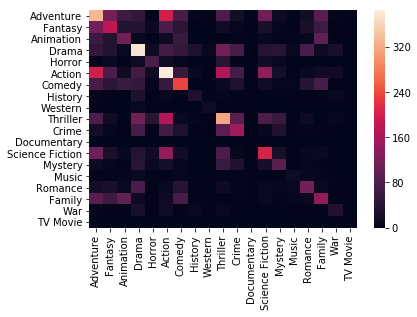

In [35]:
annot_lookup = []
for i in xrange(len(nr_ids)):
    annot_lookup.append(Genre_ID_to_name[nr_ids[i]])

sns.heatmap(visGrid, xticklabels=annot_lookup, yticklabels=annot_lookup)

The above image shows how often the genres occur together, as a heatmap

Important thing to notice in the above plot is the diagonal. The diagonal corresponds to self-pairs, i.e. number of times a genre, say Drama occurred with Drama. Which is basically just a count of the total times that genre occurred! 

As we can see there are a lot of dramas in the data set, it is also a very unspecific label. There are nearly no documentaries or TV Movies. Horror is a very distinct label, and romance is also not too widely spread. 

To account for this unbalanced data, there are multiple things we can try to explore what interesting relationships can be found.

## Delving Deeper into co-occurrence of genres

What we want to do now is to look for nice groups of genres that co-occur, and see if it makes sense to us logically? Intuitively speaking, wouldn't it be fun if we saw nice boxes on the above plot - boxes of high intensity i.e. genres that occur together and don't occur much with other genres. In some ways, that would isolate the co-occurrence of some genres, and heighten the co-occurrence of others.

While the data may not show that directly, we can play with the numbers to see if that's possible. The technique used for that is called biclustering.

In [36]:
from sklearn.cluster import SpectralCoclustering

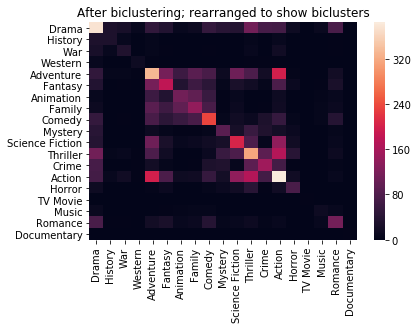

In [37]:
model = SpectralCoclustering(n_clusters=5)
model.fit(visGrid)

fit_data = visGrid[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

annot_lookup_sorted = []
for i in np.argsort(model.row_labels_):
    annot_lookup_sorted.append(Genre_ID_to_name[nr_ids[i]])
    
sns.heatmap(fit_data, xticklabels=annot_lookup_sorted, yticklabels=annot_lookup_sorted, annot=False)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()

Looking at the above figure, "boxes" or groups of movie genres automatically emerge! 

Intuitively - Crime, Sci-Fi, Mystery, Action, Horror, Drama, Thriller, etc co-occur. 
AND, Romance, Fantasy, Family, Music, Adventure, etc co-occur. 

That makes a lot of intuitive sense, right?

One challenge is the broad range of the drama genre. It makes the two clusters highly overlapping. If we merge it together with action thriller, etc. We will end up with nearly all movies just having that label. 

**Based on playing around with the stuff above, we can sort the data into the following genre categories - "Drama, Action, ScienceFiction, exciting(thriller, crime, mystery), uplifting(adventure, fantasy, animation, comedy, romance, family), Horror, History"**


Note: that this categorization is subjective and by no means the only right solution. One could also just stay with the original labels and only exclude the ones with not enough data. Such tricks are important to balance the dataset, it allows us to increase or decrease the strength of certain signals, making it possible to improve our inferences :)

# Interesting Questions
This really should be a place for you to get creative and hopefully come up with better questions than me. 

Here are some of my thoughts:
- Which actors are bound to a genre, and which can easily hop genres?
- Is there a trend in genre popularity over the years?
- Can you use sound tracks to identify the genre of a movie?
- Are top romance actors higher paid than top action actors?
- If you look at release date vs popularity score, which movie genres have a longer shelf life?

Ideas to explore specifically for feature correlations:
- Are title length correlated with movie genre?
- Are movie posters darker for horror than for romance end comedy?
- Are some genres specifically released more often at a certain time of year? 
- Is the RPG rating correlated with the genre?

# Based on this new category set, we will now pull posters from TMDB as our training data!

In [41]:
# Done before, reading from pickle file now to maintain consistency of data!
# We now sample 100 movies per genre. Problem is that the sorting is by popular movies, so they will overlap. 
# Need to exclude movies that were already sampled. 
movies = []
baseyear = 2017

print('Starting pulling movies from TMDB. If you want to debug, uncomment the print command. This will take a while, please wait...')
done_ids=[]
for g_id in nr_ids:
    #print('Pulling movies for genre ID '+g_id)
    baseyear -= 1
    for page in xrange(1,6,1):
        time.sleep(0.5)
    
        url = 'https://api.themoviedb.org/3/discover/movie?api_key=' + api_key
        url += '&language=en-US&sort_by=popularity.desc&year=' + str(baseyear) 
        url += '&with_genres=' + str(g_id) + '&page=' + str(page)

        data = urllib2.urlopen(url).read()

        dataDict = json.loads(data)
        movies.extend(dataDict["results"])
    done_ids.append(str(g_id))
print("Pulled movies for genres - "+','.join(done_ids))

Starting pulling movies from TMDB. If you want to debug, uncomment the print command. This will take a while, please wait...
Pulled movies for genres - 12


In [42]:
# f6=open("movies_for_posters",'wb')
# pickle.dump(movies,f6)
# f6.close()

In [43]:
f6=open("movies_for_posters",'rb')
movies=pickle.load(f6)
f6.close()

Let's remove any duplicates that we have in the list of movies

In [44]:
movie_ids = [m['id'] for m in movies]
print "originally we had ",len(movie_ids)," movies"
movie_ids=np.unique(movie_ids)
print len(movie_ids)
seen_before=[]
no_duplicate_movies=[]
for i in range(len(movies)):
    movie=movies[i]
    id=movie['id']
    if id in seen_before:
        continue
#         print "Seen before"
    else:
        seen_before.append(id)
        no_duplicate_movies.append(movie)
print "After removing duplicates we have ",len(no_duplicate_movies), " movies"

originally we had  1670  movies
1608
After removing duplicates we have  1608  movies


Also, let's remove movies for which we have no posters!

In [45]:
poster_movies=[]
counter=0
movies_no_poster=[]
print("Total movies : ",len(movies))
print("Started downloading posters...")
for movie in movies:
    id=movie['id']
    title=movie['title']
    if counter==1:
        print('Downloaded first. Code is working fine. Please wait, this will take quite some time...')
    if counter%300==0 and counter!=0:
        print "Done with ",counter," movies!"
        print "Trying to get poster for ",title
    try:
        grab_poster_tmdb(title)
        poster_movies.append(movie)
    except:
        try:
            time.sleep(7)
            grab_poster_tmdb(title)
            poster_movies.append(movie)
        except:
            movies_no_poster.append(movie)
    counter+=1
print("Done with all the posters!")

('Total movies : ', 1670)
Started downloading posters...
Downloaded first. Code is working fine. Please wait, this will take quite some time...
Done with  300  movies!
Trying to get poster for  Gravity
Done with  600  movies!
Trying to get poster for  Zombieland
Done with  900  movies!
Trying to get poster for  The Substitute
Done with  1200  movies!
Trying to get poster for  Decoys
Done with  1500  movies!
Trying to get poster for  Lost and Delirious
Done with all the posters!


In [46]:
print len(movies_no_poster)
print len(poster_movies)

170
1500


In [47]:
# f=open('poster_movies.pckl','w')
# pickle.dump(poster_movies,f)
# f.close()

In [48]:
f=open('poster_movies.pckl','r')
poster_movies=pickle.load(f)
f.close()

In [49]:
# f=open('no_poster_movies.pckl','w')
# pickle.dump(movies_no_poster,f)
# f.close()

In [50]:
f=open('no_poster_movies.pckl','r')
movies_no_poster=pickle.load(f)
f.close()

# Congratulations, we are done scraping!

# Building a dataset out of the scraped information!

This task is simple, but **extremely** important. It's basically what will set the stage for the whole project. Given that you have the freedom to cast their own project within the framework I am providing, there are many decisions that you must make to finalize **your own version** of the project.

As we are working on a **classification** problem, we need to make two decisions given the data at hand - 
* What do we want to predict, i.e. what's our Y?
* What features to use for predicting this Y, i.e. what X should we use?

There are many different options possible, and it comes down to you to decide what's most exciting. I will be picking my own version for the example, **but it is imperative that you think this through, and come up with a version which excites you!**

As an example, here are some possible ways to frame Y, while still sticking to the problem of genre prediction -

* Assume every movie can have multiple genres, and then it becomes a multi-label classification problem. For example, a movie can be Action, Horror and Adventure simultaneously. Thus, every movie can be more than one genre.

* Make clusters of genres as we did in Milestone 1 using biclustering, and then every movie can have only 1 genre. This way, the problem becomes a simpler, multi-class problem. For example, a movie could have the class - Uplifting (refer Milestone 1), or Horror or History. No movie get's more than one class.

For the purposes of this implementation, I'm going with the first case explained above - i.e. a multi-label classification problem.

Similarly, for designing our input features i.e. X, you may pick any features you think make sense, for example, the Director of a movie may be a good predictor for genre. OR, they may choose any features they design using algorithms like PCA. Given the richness of IMDB, TMDB and alternate sources like Wikipedia, there is a plethora of options available. **Be creative here!**

Another important thing to note is that in doing so, we must also make many more small implementation decisions on the way. For example, what genres are we going to include? what movies are we going to include? All these are open ended!

## My Implementation

Implementation decisions made - 
* The problem is framed here as a multi-label problem explained above. 
* We will try to predict multiple genres associated with a movie. This will be our Y.
* We will use 2 different kinds of X - text and images. 
* For the text part - Input features being used to predict the genre is a form of the movie's plot available from TMDB using the property 'overview'. This will be our X.
* For the image part - we will use the scraped poster images as our X. 

NOTE : We will first look at some conventional machine learning models, which were popular before the recent rise of neural networks and deep learning. For the poster image to genre prediction, I have avoided using this for the reason that conventional ML models are simply not used anymore without using deep learning for feature extraction (all discussed in detail ahead, don't be scared by the jargon). For the movie overview to genre prediction problem we will look at both conventional models and deep learning models. 

Now, let's build our X and Y!

First, let's identify movies that have overviews. **Next few steps are going to be a good example on why data cleaning is important!**

In [51]:
movies_with_overviews=[]
for i in range(len(no_duplicate_movies)):
    movie=no_duplicate_movies[i]
    id=movie['id']
    overview=movie['overview']
    
    if len(overview)==0:
        continue
    else:
        movies_with_overviews.append(movie)
        
len(movies_with_overviews)

1595

Now let's store the genre's for these movies in a list that we will later transform into a binarized vector. 

Binarized vector representation is a very common and important way data is stored/represented in ML. Essentially, it's a way to reduce a categorical variable with n possible values to n binary indicator variables. What does that mean? For example, let [(1,3),(4)] be the list saying that sample A has two labels 1 and 3, and sample B has one label 4. For every sample, for every possible label, the representation is simply 1 if it has that label, and 0 if it doesn't have that label. So the binarized version of the above list will be -
~~~~~
[(1,0,1,0]),
(0,0,0,1])]
~~~~~

In [52]:
# genres=np.zeros((len(top1000_movies),3))
genres=[]
all_ids=[]
for i in range(len(movies_with_overviews)):
    movie=movies_with_overviews[i]
    id=movie['id']
    genre_ids=movie['genre_ids']
    genres.append(genre_ids)
    all_ids.extend(genre_ids)

In [53]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb=MultiLabelBinarizer()
Y=mlb.fit_transform(genres)

In [54]:
genres[1]

[28, 12, 35, 10749]

In [55]:
print Y.shape
print np.sum(Y, axis=0)

(1595, 20)
[327 234 220 645 222 438 404 138  45 440 233 133 242 196 135 232 256  80
  23  25]


In [62]:
len(list_of_genres)

19

This is interesting. We started with only 19 genre labels if you remember. But the shape for Y is 1666,20 while it should be 1666,19 as there are only 19 genres? Let's explore.

Let's find genre IDs that are not present in our original list of genres!

In [63]:
# Create a tmdb genre object!
genres=tmdb.Genres()
# the list() method of the Genres() class returns a listing of all genres in the form of a dictionary.
list_of_genres=genres.list()['genres']
Genre_ID_to_name={}
for i in range(len(list_of_genres)):
    genre_id=list_of_genres[i]['id']
    genre_name=list_of_genres[i]['name']
    Genre_ID_to_name[genre_id]=genre_name

In [64]:
for i in set(all_ids):
    if i not in Genre_ID_to_name.keys():
        print i

10769


Well, this genre ID wasn't given to us by TMDB when we asked it for all possible genres. How do we go about this now? We can either neglect all samples that have this genre. But if you look up you'll see there's too many of these samples. So, I googled more and went into their documentation and found that this ID corresponds to the genre "Foreign". So, we add it to the dictionary of genre names ourselves. Such problems are ubiquitous in machine learning, and it is up to us to diagnose and correct them. We must always make a decision about what to keep, how to store data and so on. 

In [65]:
Genre_ID_to_name[10769]="Foreign" #Adding it to the dictionary

In [66]:
len(Genre_ID_to_name.keys())

20

Now, we turn to building the X matrix i.e. the input features! As described earlier, we will be using the overview of movies as our input vector! Let's look at a movie's overview for example!

In [67]:
sample_movie=movies_with_overviews[5]
sample_overview=sample_movie['overview']
sample_title=sample_movie['title']
print "The overview for the movie",sample_title," is - \n\n"
print sample_overview

The overview for the movie Doctor Strange  is - 


After his career is destroyed, a brilliant but arrogant surgeon gets a new lease on life when a sorcerer takes him under his wing and trains him to defend the world against evil.


## So, how do we store this movie overview in a matrix?

#### Do we just store the whole string? We know that we need to work with numbers, but this is all text. What do we do?!

The way we will be storing the X matrix is called a "Bag of words" representation. The basic idea of this representation in our context is that we can think of all the distinct words that are possible in the movies' reviews as a distinct object. And then every movie overview can be thought as a "Bag" containing a bunch of these possible objects.

For example, in the case of Zootopia the movie above - The "Bag" contains the words ("Determined", "to", "prove", "herself"......"the", "mystery"). We make such lists for all movie overviews. Finally, we binarize again like we did above for Y. scikit-learn makes our job easy here by simply using a function CountVectorizer() because this representation is so often used in Machine Learning.

What this means is that, for all the movies that we have the data on, we will first count all the unique words. Say, there's 30,000 unique words. Then we can represent every movie overview as a 30000x1 vector, where each position in the vector corresponds to the presence or absence of a particular word. If the word corresponding to that position is present in the overview, that position will have 1, otherwise it will be 0. 

Ex - if our vocabular was 4 words - "I","am","a","good","boy", then the representation for the sentence "I am a boy" would be [1 1 1 0 1], and for the sentence "I am good" would be [1 1 0 1 0].

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
import re

In [69]:
content=[]
for i in range(len(movies_with_overviews)):
    movie=movies_with_overviews[i]
    id=movie['id']
    overview=movie['overview']
    overview=overview.replace(',','')
    overview=overview.replace('.','')
    content.append(overview)

In [70]:
print content[0]
print len(content)

A teenager finds himself transported to an island where he must help protect a group of orphans with special powers from creatures intent on destroying them
1595


# Are all words equally important?

#### At the cost of sounding "Animal Farm" inspired, I would say not all words are equally important. 

For example, let's consider the overview for the Matrix - 

In [75]:
get_movie_info_tmdb('The Matrix')['overview']

u'Set in the 22nd century, The Matrix tells the story of a computer hacker who joins a group of underground insurgents fighting the vast and powerful computers who now rule the earth.'

For "The Matrix" a word like "computer" is a stronger indicators of it being a Sci-Fi movie, than words like "who" or "powerful" or "vast". One way computer scientists working with natural language tackled this problem in the past (and it is still used very popularly) is what we call TF-IDF i.e. Term Frequence, Inverse Document Frequency. The basic idea here is that words that are strongly indicative of the content of a single document (every movie overview is a document in our case) are words that occur very frequently in that document, and very infrequently in all other documents. For example, "Computer" occurs twice here but probably will not in most other movie overviews. Hence, it is indicative. On the other hand, generic words like "a","and","the" will occur very often in all documents. Hence, they are not indicative. 

So, can we use this information to reduce our insanely high 30,000 dimensional vector representation to a smaller, more handle-able number? But first up, why should we even care? The answer is probably one of the most used phrases in ML - "The Curse of Dimensionality".

# The Curse of Dimensionality

#### This section is strongly borrowing from one of the greatest <a href="https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf">ML papers I've ever read.</a>

This expression was coined by Bellman in 1961 to refer to the fact that many algorithms that work fine in low dimensions become intractable when the input is high-dimensional. The reason for them not working in high dimensions is very strongly linked to what we discussed earlier - having a representative dataset. Consider this, you have a function $f$ dependent only one dependent variable $x$, and $x$ can only integer values from 1 to 100. Since it's one dimensional, it can be plotted on a line. To get a representative sample, you'd need to sample something like - $f(1),f(20),f(40),f(60),f(80),f(100)$

Now, let's increase the dimensionality i.e. number of dependent variables and see what happens. Say, we have 2 variables $x_1$ and $x_2$, same possible as before - integers between 1 and 100. Now, instead of a line, we'll have a plane with $x_1$ and $x_2$ on the two axes. The interesting bit is that instead of 100 possible values of dependent variables like before, we now have 100,000 possible values! Basically, we can make 100x100 table of possible values of $x_1$ and $x_2$. Wow, that increased exponentially. Not just figuratively, but mathematically exponentially. Needless to say, to cover 5% of the space like we did before, we'd need to sample $f$ at 5000 values. 

For 3 variables, it would be 100,000,000, and we'd need to sample at 500,000 points. That's already more than the number of data points we have for most training problems we will ever come across.

Basically, as the dimensionality (number of features) of the examples grows, because a fixed-size training set covers a dwindling fraction of the input space. Even with a moderate dimension of 100 and a huge training set of a trillion examples, the latter covers only a fraction of about $10^{−18}$ of the input space. This is what makes machine learning
both necessary and hard.

So, yes, if some words are unimportant, we want to get rid of them and reduce the dimensionality of our X matrix. And the way we will do it is using TF-IDF to identify un-important words. Python let's us do this with just one line of code (And this is why you should spend more time reading maths, than coding!)

In [76]:
# The min_df paramter makes sure we exclude words that only occur very rarely
# The default also is to exclude any words that occur in every movie description
vectorize=CountVectorizer(max_df=0.95, min_df=0.005)
X=vectorize.fit_transform(content)

We are excluding all words that occur in too many or too few documents, as these are very unlikely to be discriminative. Words that only occur in one document most probably are names, and words that occur in nearly all documents are probably stop words. Note that the values here were not tuned using a validation set. They are just guesses. It is ok to do, because we didn't evaluate the performance of these parameters. In a strict case, for example for a publication, it would be better to tune these as well. 

In [77]:
X.shape

(1595, 1365)

So, each movie's overview gets represented by a 1x1365 dimensional vector.

Now, we are ready for the kill. Our data is cleaned, hypothesis is set (Overview can predict movie genre), and the feature/output vectors are prepped. Let's train some models!

In [78]:
import pickle
f4=open('X.pckl','wb')
f5=open('Y.pckl','wb')
pickle.dump(X,f4)
pickle.dump(Y,f5)
f6=open('Genredict.pckl','wb')
pickle.dump(Genre_ID_to_name,f6)
f4.close()
f5.close()
f6.close()

# Congratulations, we have our data set ready!

A note : As we are building our own dataset, and I didn't want you to spend all your time waiting for poster image downloads to finish, I am working with an EXTREMELY small dataset. That is why, the results we will see for the deep learning portion will not be spectacular as compared to conventional machine learning methods. If you want to see the real power, you should spend some more time scraping something of the order of 100,000 images, as opposed to 1000 odd like I am doing here. Quoting the paper I mentioned above -  MORE DATA BEATS A CLEVERER ALGORITHM.

#### As the TA, I saw that most teams working on the project had data of the order of 100,000 movies. So, if you want to extract the power of these models, consider scraping a larger dataset than me.

# Section 5 - Non-deep, Conventional ML models with above data

Here is a layout of what we will be doing - 

- We will implement two different models
- We will decide a performance metric i.e. a quantitative method to be sure about how well difference models are doing. 
- Discussion of the differences between the models, their strengths, weaknesses, etc. 

As discussed earlier, there are a LOT of implementation decisions to be made. Between feature engineering, hyper-parameter tuning, model selection and how interpretable do you want your model to be (Read : Bayesian vs Non-Bayesian approaches) a lot is to be decided. For example, some of these models could be: 

- Generalized Linear Models
- SVM
- Shallow (1 Layer, i.e. not deep) Neural Network
- Random Forest
- Boosting
- Decision Tree

Or go more bayesian:
- Naive Bayes
- Linear or Quadratic Discriminant Analysis
- Bayesian Hierarchical models

The list is endless, and not all models will make sense for the kind of problem you have framed for yourself. ** Think about which model best fits for your purpose.**

For our purposes here, I will be showing the example of 2 very simple models, one picked from each category above - 

1. SVM
2. Multinomial Naive Bayes

A quick overview of the whole pipeline coming below: 
    
- A little bit of feature engineering
- 2 different Models 
- Evaluation Metrics chosen
- Model comparisons

### Let's start with some feature engineering. 

Engineering the right features depends on 2 key ideas. Firstly, what is it that you are trying to solve? For example, if you want to guess my music preferences and you try to train a super awesome model while giving it what my height is as input features, you're going to have no luck. On the other hand, giving it my Spotify playlist will solve the problem with any model. So, CONTEXT of the problem plays a role. 

Second, you can only represent based on the data at hand. Meaning, if you didn't have access to my Spotify playlist, but to my Facebook statuses - You know all my statuses about Harvard may not be useful. But if you represent me as my Facebook statuses which are YouTube links, that would also solve the problem. So, AVAILABILITY OF DATA at hand is the second factor. 

#### A nice way to think of it is to think that you start with the problem at hand, but design features constrained by the data you have available. If you have many independent features that each correlate well with the class, learning is easy. On the other hand, if the class is a very complex function of the features, you may not be able to learn it.


In the context of this problem, we would like to predict the genre of a movie. what we have access to - movie overviews, which are text descriptions of the movie plot. The hypothesis makes sense, overview is a short description of the story and the story is clearly important in assigning genres to movies. 

So, let's improve our features by playing with the words in the overviews in our data. One interesting way to go back to what we discussed earlier - TF-IDF. We originally used it to filter words, but we can also assign the tf-idf values as "importance" values to words, as opposed to treating them all equally. Tf-idf simply tries to identify the assign a weightage to each word in the bag of words. 

Once again, the way it works is - Most movie descriptions have the word "The" in it. Obviously, it doesn't tell you anything special about it. So weightage should be inversely proportional to how many movies have the word in their description. This is the IDF part.

On the other hand, for the movie interstellar, if the description has the word Space 5 times, and wormhole 2 times, then it's probably more about Space than about wormhole. Thus, space should have a high weightage. This is the TF part. 

We simply use TF-IDf to assign weightage to every word in the bag of words. Which makes sense, right? :)

In [79]:
from sklearn.feature_extraction.text import TfidfTransformer

In [80]:
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)
X_tfidf.shape

(1595, 1365)

Let's divide our X and Y matrices into train and test split. We train the model on the train split, and report the performance on the test split. Think of this like the questions you do in the problem sets v/s the exam. Of course, they are both (assumed to be) from the same population of questions. And doing well on Problem Sets is a good indicator that you'll do well in exams, but really, you must test before you can make any claims about you knowing the subject.

In [81]:
msk = np.random.rand(X_tfidf.shape[0]) < 0.8

In [82]:
X_train_tfidf=X_tfidf[msk]
X_test_tfidf=X_tfidf[~msk]
Y_train=Y[msk]
Y_test=Y[~msk]
positions=range(len(movies_with_overviews))
# print positions
test_movies=np.asarray(positions)[~msk]
# test_movies

In [83]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report

In [98]:
parameters = {'kernel':['linear'], 'C':[0.01, 0.1, 1.0]}
gridCV = GridSearchCV(SVC(class_weight='balanced'), parameters, scoring=make_scorer(f1_score, average='micro'))
classif = OneVsRestClassifier(gridCV)

classif.fit(X_train_tfidf, Y_train)

OneVsRestClassifier(estimator=GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),...refit=True, return_train_score=True,
       scoring=make_scorer(f1_score, average=micro), verbose=0),
          n_jobs=1)

In [99]:
predstfidf=classif.predict(X_test_tfidf)

print classification_report(Y_test, predstfidf, target_names=genre_names)

                 precision    recall  f1-score   support

      Adventure       0.42      0.57      0.48        56
        Fantasy       0.46      0.67      0.55        45
      Animation       0.27      0.42      0.33        31
          Drama       0.60      0.57      0.58       132
         Horror       0.00      0.00      0.00        41
         Action       0.49      0.67      0.57        70
         Comedy       0.40      0.53      0.46        77
        History       0.40      0.37      0.38        27
        Western       0.33      0.14      0.20         7
       Thriller       0.26      1.00      0.41        76
          Crime       0.46      0.48      0.47        46
    Documentary       0.61      0.67      0.64        21
Science Fiction       0.12      1.00      0.22        36
        Mystery       0.23      0.37      0.29        35
          Music       0.95      0.59      0.73        34
        Romance       0.35      0.50      0.41        46
         Family       0.32    

As you can see, the performance is by and large poorer for movies which are less represented like War and animation, and better for categories like Drama.

Numbers aside, let's look at our model's predictions for a small sample of movies from our test set.

In [101]:
genre_list=sorted(list(Genre_ID_to_name.keys()))

In [102]:
predictions=[]
for i in range(X_test_tfidf.shape[0]):
    pred_genres=[]
    movie_label_scores=predstfidf[i]
#     print movie_label_scores
    for j in range(20):
        #print j
        if movie_label_scores[j]!=0:
            genre=Genre_ID_to_name[genre_list[j]]
            pred_genres.append(genre)
    predictions.append(pred_genres)

In [103]:
import pickle
f=open('classifer_svc','wb')
pickle.dump(classif,f)
f.close()

In [115]:
for i in range(X_test_tfidf.shape[0]):
    if i%50==0 and i!=0:
        print 'MOVIE: ',movies_with_overviews[i]['title'],'\tPREDICTION: ',','.join(predictions[i])

MOVIE:  The Walk 	PREDICTION:  Adventure,Fantasy,Animation,Action,Thriller,Science Fiction
MOVIE:  Cinderella 	PREDICTION:  Adventure,Fantasy,Action,Thriller,Science Fiction
MOVIE:  Liza, the Fox-Fairy 	PREDICTION:  Drama,Thriller,Science Fiction,Romance,War
MOVIE:  The Polar Express 	PREDICTION:  Adventure,Action,Thriller,Science Fiction,Family
MOVIE:  Patema Inverted 	PREDICTION:  Thriller,Science Fiction,Music


Let's try our second model? The naive bayes model.

In [116]:
from sklearn.naive_bayes import MultinomialNB
classifnb = OneVsRestClassifier(MultinomialNB())
classifnb.fit(X[msk].toarray(), Y_train)
predsnb=classifnb.predict(X[~msk].toarray())

In [117]:
import pickle
f2=open('classifer_nb','wb')
pickle.dump(classifnb,f2)
f2.close()

In [118]:
predictionsnb=[]
for i in range(X_test_tfidf.shape[0]):
    pred_genres=[]
    movie_label_scores=predsnb[i]
    for j in range(20):
        #print j
        if movie_label_scores[j]!=0:
            genre=Genre_ID_to_name[genre_list[j]]
            pred_genres.append(genre)
    predictionsnb.append(pred_genres)

In [120]:
for i in range(X_test_tfidf.shape[0]):
    if i%50==0 and i!=0:
        print 'MOVIE: ',movies_with_overviews[i]['title'],'\tPREDICTION: ',','.join(predictionsnb[i])

MOVIE:  The Walk 	PREDICTION:  Adventure,Fantasy,Animation,Science Fiction
MOVIE:  Cinderella 	PREDICTION:  Adventure,Action,Science Fiction
MOVIE:  Liza, the Fox-Fairy 	PREDICTION:  Drama,Romance
MOVIE:  The Polar Express 	PREDICTION:  Science Fiction
MOVIE:  Patema Inverted 	PREDICTION:  Documentary,Music


As can be seen above, the results seem promising, but how do we really compare the two models? We need to quantify our performance so that we can say which one's better. Takes us back to what we discussed right in the beginning - we're learning a function $g$ which can approximate the original unknown function $f$. For some values of $x_i$, the predictions will be wrong for sure, and we want to minimize it. 

For multi label systems, we often keep track of performance using "Precision" and "Recall". These are standard metrics, and you can google to read up more about them if you're new to these terms.

# Evaluation Metrics

We will use the standard precision recall metrics for evaluating our system.

In [46]:
def precision_recall(gt,preds):
    TP=0
    FP=0
    FN=0
    for t in gt:
        if t in preds:
            TP+=1
        else:
            FN+=1
    for p in preds:
        if p not in gt:
            FP+=1
    if TP+FP==0:
        precision=0
    else:
        precision=TP/float(TP+FP)
    if TP+FN==0:
        recall=0
    else:
        recall=TP/float(TP+FN)
    return precision,recall

In [122]:
precs=[]
recs=[]
for i in range(len(test_movies)):
    if i%1==0:
        pos=test_movies[i]
        test_movie=movies_with_overviews[pos]
        gtids=test_movie['genre_ids']
        gt=[]
        for g in gtids:
            g_name=Genre_ID_to_name[g]
            gt.append(g_name)
#         print predictions[i],movies_with_overviews[i]['title'],gt
        a,b=precision_recall(gt,predictions[i])
        precs.append(a)
        recs.append(b)

print np.mean(np.asarray(precs)),np.mean(np.asarray(recs))

0.33085149314 0.570960451977


In [123]:
precs=[]
recs=[]
for i in range(len(test_movies)):
    if i%1==0:
        pos=test_movies[i]
        test_movie=movies_with_overviews[pos]
        gtids=test_movie['genre_ids']
        gt=[]
        for g in gtids:
            g_name=Genre_ID_to_name[g]
            gt.append(g_name)
#         print predictions[i],movies_with_overviews[i]['title'],gt
        a,b=precision_recall(gt,predictionsnb[i])
        precs.append(a)
        recs.append(b)

print np.mean(np.asarray(precs)),np.mean(np.asarray(recs))

0.48893866021 0.549604519774


The average precision and recall scores for our samples are pretty good! Models seem to be working! Also, we can see that the Naive Bayes performs outperforms SVM. **I strongly suggest you to go read about Multinomial Bayes and think about why it works so well for "Document Classification", which is very similar to our case as every movie overview can be thought of as a document we are assigning labels to.**

# Section 6 - Deep Learning : an intuitive overview

The above results were good, but it's time to bring out the big guns. So first and foremost, let's get a very short idea about what's deep learning. This is for peope who don't have background in this - it's high level and gives just the intuition. 

As described above, the two most immportant concepts in doing good classification (or regression) are to 1) use the right representation which captures the right information about the data which is relavant to the problem at hand 2) Using the right model which has the capability of making sense of the representation fed to it. 

While for the second part we have complicated and powerful models that we have studied at length, we don't seem to have a principled, mathematical way of doing the first part - i.e. representation. What we did above was to see "What makes sense", and go from there. That is not a good approach for complex data/ complex problems. Is there some way to automate this? Deep Learning, does just this.

To just emphasize the importance of representation in the complex tasks we usually attempt with Deep Learning, let me talk about the original problem which made it famous. The paper is often reffered to as the "Imagenet Challenge Paper", and it was basically working on object recognition in images. Let's try to think about an algorithm that tries to detect a chair. 

## If I ask you to "Define" a chair, how would you? - Something with 4 legs?

<img src="files/chair1.png" height="400" width="400">
<h3><center>All are chairs, none with 4 legs. (Pic Credit: Zoya Bylinskii)</center></h3>

## How about some surface that we sit on then?

<img src="files/chair2.png" height="400" width="400">
<h3><center>All are surfaces we sit on, none are chairs. (Pic Credit: Zoya Bylinskii)</center></h3>

Clearly, these definitions won't work and we need something more complicated. Sadly, we can't come up with a simple text rule that our computer can search for! And we take a more principled approach.

The "Deep" in the deep learning comes from the fact that it was conventionally applied to Neural Networks. Neural Networks, as we all know, are structures organized in layers. Layers of computations. Why do we need layers? Because these layers can be seen as sub-tasks that we do in the complicated task of identifying a chair. It can be thought as a heirarchical break down of a complicated job into smalled sub-tasks. 

Mathematically, each layer acts like a space transformation which takes the pixel values to a high dimensional space. When we start out, every pixel in the image is given equal importance in our matrix. With each layer, convolution operations give some parts more importance, and some lesser importance. In doing so, we transform our images to a space in which similar looking objects/object parts are closer (We are basically learning this space transformation in deep learning, nothing else)


What exactly was learnt by these neural networks is hard to know, and an active area of research. But one very crude way to visualize what it does is to think like - It starts by learning very generic features in the first layer. Something as simple as vertical and horizontal lines. In the next layer, it learns that if you combine the vectors representing vertical and horizontal vectors in different ratios, you can make all possible slanted lines. Next layer learns to combine lines to form curves - Say, something like the outline of a face. These curves come together to form 3D objects. And so on. Building sub-modules, combining them in the right way which can give it semantics.

**So, in a nutshell, the first few layers of a "Deep" network learn the right representation of the data, given the problem (which is mathematically described by your objective function trying to minimize difference between ground truth and predicted labels). The last layer simply looks how close or far apart things are in this high dimensional space.**

Hence, we can give any kind of data a high dimensional representation using neural networks. Below we will see high dimensional representations of both words in overviews (text) and posters (image). Let's get started with the posters i.e. extracting visual features from posters using deep learning.

# Section 7 - Deep Learning for predicting genre from poster

Once again, we must make an implementation decision. This time, it has more to do with how much time are we willing to spend in return for added accuracy. We are going to use here a technique that is commonly referred to as Pre-Training in Machine Learning Literature. 

Instead of me trying to re-invent the wheel here, I am going to borrow this short section on pre-training from Stanford University's lecture on <a href='http://cs231n.github.io/transfer-learning/'> CNN's</a>. To quote - 

''In practice, very few people train an entire Convolutional Network from scratch (with random initialization), because it is relatively rare to have a dataset of sufficient size. Instead, it is common to pretrain a ConvNet on a very large dataset (e.g. ImageNet, which contains 1.2 million images with 1000 categories), and then use the ConvNet either as an initialization or a fixed feature extractor for the task of interest. ''

There are three broad ways in which transfer learning or pre-training can be done. (The 2 concepts are different and to understand the difference clearly, I suggest you read the linked lecture thoroughly). The way we are going to about it is by using a pre-trained, released ConvNet as feature extractor. Take a ConvNet pretrained on ImageNet (a popular object detection dataset), remove the last fully-connected layer. After removing the last layer, what we have is just another neural network i.e. a stack of space tranformations. But, originally the output of this stack can be pumped into a single layer which can classify the image into categories like Car, Dog, Cat and so on.

What this means, is that in the space this stack transforms the images to, all images which contain a "dog" are closer to each other, and all images containing a "cat" are closer. Thus, it is a meaningful space where images with similar objects are closer. 

Think about it, now if we pump our posters through this stack, it will embed them in a space where posters which contain similar objects are closer. This is a very meaningful feature engineering method! While this may not be ideal for genre prediction, it might be quite meaningful. For example, all posters with a gun or a car are probably action. While a smiling couple would point to romance or drama. The alternative would be to train the CNN from scratch which is fairly computationally intensive and involves a lot of tricks to get the CNN training to converge to the optimal space tranformation.

This way, we can start off with something strong, and then build on top. We pump our images through the pre-trained network to extract the visual features from the posters. Then, using these features as descriptors for the image, and genres as the labels, we train a simpler neural network from scratch which learns to do simply classification on this dataset. These 2 steps are exactly what we are going to do for predicting genres from movie posters.

## Deep Learning to extract visual features from posters

The basic problem here we are answering is that can we use the posters to predict genre. First check - Does this hypothesis make sense? Yes. Because that's what graphic designers do for a living. They leave visual cues to semantics. They make sure that when we look at the poster of a horror movie, we know it's not a happy image. Things like that. Can our deep learning system infer such subtleties? Let's find out!

For Visual features, either we can train a deep neural network ourselves from scratch, or we can use a pre-trained one made available to us from the Visual Geometry Group at Oxford University, one of the most popular methods. This is called the VGG-net. Or as they call it, we will extract the VGG features of an image. Mathematically, as mentioned, it's just a space transformation in the form of layers. So, we simply need to perform this chain of transformations on our image, right? Keras is a library that makes it very easy for us to do this. Some other common ones are Tensorflow and PyTorch. While the latter two are very powerful and customizable and used more often in practice, Keras makes it easy to prototype by keeping the syntax simple.


We will be working with Keras to keep things simple in code, so that we can spend more time understanding and less time coding. Some common ways people refer to this step are - "Getting the VGG features of an image", or "Forward Propogating the image through VGG and chopping off the last layer". In keras, this is as easy as writing 4 lines. 

In [3]:
# Loading the list of movies we had downloaded posters for eariler - 
f=open('poster_movies.pckl','r')
poster_movies=pickle.load(f)
f.close()

In [4]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import pickle
model = VGG16(weights='imagenet', include_top=False)

Using TensorFlow backend.


In [467]:
allnames=os.listdir(poster_folder)
imnames=[j for j in allnames if j.endswith('.jpg')]
feature_list=[]
genre_list=[]
file_order=[]
print "Starting extracting VGG features for scraped images. This will take time, Please be patient..."
print "Total images = ",len(imnames)
failed_files=[]
succesful_files=[]
i=0
for mov in poster_movies:
    i+=1
    mov_name=mov['original_title']
    mov_name1=mov_name.replace(':','/')
    poster_name=mov_name.replace(' ','_')+'.jpg'
    if poster_name in imnames:
        img_path=poster_folder+poster_name
        try:
            img = image.load_img(img_path, target_size=(224, 224))
            succesful_files.append(imname)
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x = preprocess_input(x)
            features = model.predict(x)
            file_order.append(img_path)
            feature_list.append(features)
            genre_list.append(mov['genre_ids'])
            if np.max(np.asarray(feature_list))==0.0:
                print('problematic',i)
            if i%250==0 or i==1:
                print "Working on Image : ",i
        except:
            failed_files.append(imname)
            continue
        
    else:
        continue
print "Done with all features, please pickle for future use!"

Starting extracting VGG features for scraped images. This will take time, Please be patient...
Total images =  1347
Working on Image :  250
Working on Image :  500
Working on Image :  750
Working on Image :  1000
Working on Image :  1250
Working on Image :  1500
Done with all features, please pickle for future use!


In [476]:
len(genre_list)

1317

In [477]:
len(feature_list)

1317

In [472]:
# Reading from pickle below, this code is not to be run.
list_pickled=(feature_list,file_order,failed_files,succesful_files,genre_list)
f=open('posters_new_features.pckl','wb')
pickle.dump(list_pickled,f)
f.close()
print("Features dumped to pickle file")

Features dumped to pickle file


In [5]:
f7=open('posters_new_features.pckl','rb')
list_pickled=pickle.load(f7)
f7.close()
# (feature_list2,file_order2)=list_pickled

### Training a simple neural network model using these VGG features.

In [6]:
(feature_list,files,failed,succesful,genre_list)=list_pickled

Let's first get the labels on our 1342 samples first! As image download fails on a few instances, the best way to work with the right model is to read the poster names downloaded, and working from there. These posters cannot be uploaded to Github as they are too large, and so are being downloaded and read from my local computer. If you do re-do it, you might have to check and edit the paths in the code to make sure it runs.

In [7]:
(a,b,c,d)=feature_list[0].shape
feature_size=a*b*c*d

This looks odd, why are we re-running the loop we ran above again below? The reason is simple, the most important thing to know about numpy is that using vstack() and hstack() are highly sub-optimal. Numpy arrays when created, a fixed size is allocated in the memory and when we stack, a new one is copied and created in a new location. This makes the code really, really slow. The best way to do it (and this remains the same with MATLAB matrices if you work with them), is to create a numpy array of zeros, and over-write it row by row. The above code was just to see what size numpy array we will need!

The final movie poster set for which we have all the information we need, is 1265 movies. In the above code we are making an X numpy array containing the visual features of one image per row. So, the VGG features are reshaped to be in the shape (1,25088) and we finally obtain a matrix of shape (1265,25088)

In [8]:
np_features=np.zeros((len(feature_list),feature_size))
for i in range(len(feature_list)):
    feat=feature_list[i]
    reshaped_feat=feat.reshape(1,-1)
    np_features[i]=reshaped_feat

In [9]:
# np_features[-1]

In [10]:
X=np_features

In [11]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb=MultiLabelBinarizer()
Y=mlb.fit_transform(genre_list)

In [12]:
Y.shape

(1317, 20)

Our binarized Y numpy array contains the binarized labels corresponding to the genre IDs of the 1277 movies

In [503]:
visual_problem_data=(X,Y)
f8=open('visual_problem_data_clean.pckl','wb')
pickle.dump(visual_problem_data,f8)
f8.close()

In [504]:
f8=open('visual_problem_data_clean.pckl','rb')
visual_features=pickle.load(f8)
f8.close()

In [505]:
(X,Y)=visual_features

In [506]:
X.shape

(1317, 25088)

In [507]:
mask = np.random.rand(len(X)) < 0.8

In [508]:
X_train=X[mask]
X_test=X[~mask]
Y_train=Y[mask]
Y_test=Y[~mask]

In [510]:
X_test.shape

(264, 25088)

Now, we create our own keras neural network to use the VGG features and then classify movie genres. Keras makes this super easy. 

Neural network architectures have gotten complex over the years. But the simplest ones contain very standard computations organized in layers, as described above. Given the popularity of some of these, Keras makes it as easy as writing out the names of these operations in a sequential order. This way you can make a network while completely avoiding the Mathematics (HIGHLY RECOMMENDED SPENDING MORE TIME ON THE MATH THOUGH)

Sequential() allows us to make models the follow this sequential order of layers. Different kinds of layers like Dense, Conv2D etc can be used, and many activation functions like RELU, Linear etc are also available.

# Important Question : Why do we need activation functions?
#### Copy pasting the answer I wrote for this question on <a href='https://www.quora.com/Why-do-neural-networks-need-an-activation-function/answer/Spandan-Madan?srid=5ydm'>Quora</a> Feel free to leave comments there.

""Sometimes, we tend to get lost in the jargon and confuse things easily, so the best way to go about this is getting back to our basics.

Don’t forget what the original premise of machine learning (and thus deep learning) is - IF the input and output are related by a function y=f(x), then if we have x, there is no way to exactly know f unless we know the process itself. However, machine learning gives you the ability to approximate f with a function g, and the process of trying out multiple candidates to identify the function g best approximating f is called machine learning.

Ok, that was machine learning, and how is deep learning different? Deep learning simply tries to expand the possible kind of functions that can be approximated using the above mentioned machine learning paradigm. Roughly speaking, if the previous model could learn say 10,000 kinds of functions, now it will be able to learn say 100,000 kinds (in actuality both are infinite spaces but one is larger than the other, because maths is cool that ways.)

If you want to know the mathematics of it, go read about VC dimension and how more layers in a network affect it. But I will avoid the mathematics here and rely on your intuition to believe me when I say that not all data can be classified correctly into categories using a linear function. So, we need our deep learning model to be able to approximate more complex functions than just a linear function.

Now, let’s come to your non linearity bit. Imagine a linear function y=2x+3, and another one y=4x+7. What happens if I pool them and take an average? I get another linear function y= 3x+5. So instead of doing those two computations separately and then averaging it out, I could have just used the single linear function y=3x+5. Obviously, this logic holds good if I have more than 2 such linear functions. This is exactly what will happen if you don’t have have non-linearities in your nodes, and also what others have written in their answers.

It simply follows from the definition of a linear function -

(i) If you take two linear functions, AND

(ii)Take a linear combination of them (which is how we combine the outputs of multiple nodes of a network)

You are BOUND to get a linear function because f(x)+g(x)=mx+b+nx+c=(m+n)x+(b+c)= say h(x).

And you could in essence replace your whole network by a simple matrix transformation which accounts for all linear combinations and up/downsamplings.

In a nutshell, you’ll only be trying to learn a linear approximation for original function f relating the input and the output. Which as we discussed above, is not always the best approximation. Adding non-linearities ensures that you can learn more complex functions by approximating every non-linear function as a LINEAR combination of a large number of non-linear functions.

Still new to the field, so if there’s something wrong here please comment below! Hope it helps""

#### Let's train our model then, using the features we extracted from VGG net 

The model we will use has just 1 hidden layer between the VGG features and the final output layer. The simplest neural network you can get. An image goes into this network with the dimensions (1,25088), the first layer's output is 1024 dimensional. This hidden layer output undergoes a pointwise RELU activation. This output gets transformed into the output layer of 20 dimensions. It goes through a sigmoid.

The sigmoid, or the squashing function as it is often called, is a function which squashes numbers between 0 and 1. What are you reminded of when you think of numebers between 0 and 1? Right, probability. 

By squashing the score of each of the 20 output labels between 0 and 1, sigmoid lets us interpret their scores as probabilities. Then, we can just pick the classes with the top 3 or 5 probability scores as the predicted genres for the movie poster! Simple! 

In [412]:
# Y_train[115]

In [549]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
model_visual = Sequential([
    Dense(1024, input_shape=(25088,)),
    Activation('relu'),
    Dense(256),
    Activation('relu'),
    Dense(20),
    Activation('sigmoid'),
])
opt = optimizers.rmsprop(lr=0.0001, decay=1e-6)

#sgd = optimizers.SGD(lr=0.05, decay=1e-6, momentum=0.4, nesterov=False)
model_visual.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

We train the model using the fit() function. The parameters it takes are - training features and training labels, epochs, batch_size and verbose. 

Simplest one - verbose. 0="dont print anything as you work", 1="Inform me as you go". 

Often the data set is too large to be loaded into the RAM. So, we load data in batches. For batch_size=32 and epochs=10, the model starts loading rows from X in batches of 32 everytime it calculates the loss and updates the model. It keeps on going till it has covered all the samples 10 times. 

So, the no. of times model is updated = (Total Samples/Batch Size) * (Epochs)

In [550]:
model_visual.fit(X_train, Y_train, epochs=10, batch_size=64,verbose=1)

Epoch 1/10
1053/1053 [==============================] - 7s - loss: 2.3120 - acc: 0.8160     
Epoch 2/10
1053/1053 [==============================] - 6s - loss: 1.6045 - acc: 0.8724     
Epoch 3/10
1053/1053 [==============================] - 7s - loss: 1.1555 - acc: 0.9078     
Epoch 4/10
1053/1053 [==============================] - 7s - loss: 0.9149 - acc: 0.9264     
Epoch 5/10
1053/1053 [==============================] - 6s - loss: 0.7455 - acc: 0.9420     
Epoch 6/10
1053/1053 [==============================] - 6s - loss: 0.6218 - acc: 0.9522     
Epoch 7/10
1053/1053 [==============================] - 7s - loss: 0.5393 - acc: 0.9623     
Epoch 8/10
1053/1053 [==============================] - 7s - loss: 0.5104 - acc: 0.9645     
Epoch 9/10
1053/1053 [==============================] - 6s - loss: 0.4923 - acc: 0.9644     
Epoch 10/10
1053/1053 [==============================] - 6s - loss: 0.4475 - acc: 0.9648     


In [551]:
model_visual.fit(X_train, Y_train, epochs=50, batch_size=64,verbose=0)

For the first 10 epochs I trained the model in a verbose fashion to show you what's happening. After that, in the below cell you can see I turned off the verbosity to keep the code cleaner. 

In [552]:
Y_preds=model_visual.predict(X_test)

In [553]:
sum(sum(Y_preds))

438.26369654744053

### Let's look at some of our predictions? 

In [554]:
f6=open('Genredict.pckl','rb')
Genre_ID_to_name=pickle.load(f6)
f6.close()

In [555]:
sum(Y_preds[1])

2.0173444656837738

In [556]:
sum(Y_preds[2])

2.0

In [557]:
genre_list=sorted(list(Genre_ID_to_name.keys()))

In [558]:
precs=[]
recs=[]
for i in range(len(Y_preds)):
    row=Y_preds[i]
    gt_genres=Y_test[i]
    gt_genre_names=[]
    for j in range(20):
        if gt_genres[j]==1:
            gt_genre_names.append(Genre_ID_to_name[genre_list[j]])
    top_3=np.argsort(row)[-3:]
    predicted_genres=[]
    for genre in top_3:
        predicted_genres.append(Genre_ID_to_name[genre_list[genre]])
    (precision,recall)=precision_recall(gt_genre_names,predicted_genres)
    precs.append(precision)
    recs.append(recall)
    if i%50==0:
        print "Predicted: ",','.join(predicted_genres)," Actual: ",','.join(gt_genre_names)

Predicted:  Adventure,Science Fiction,Action  Actual:  Adventure,Action,Comedy,Romance
Predicted:  Romance,Science Fiction,Adventure  Actual:  Drama
Predicted:  Adventure,Fantasy,Action  Actual:  Fantasy,Drama,Action,Western,Thriller
Predicted:  Documentary,Science Fiction,Action  Actual:  Drama,Action,Thriller,Science Fiction
Predicted:  Thriller,Action,Science Fiction  Actual:  Horror,Action,Thriller,Mystery
Predicted:  Comedy,Animation,Family  Actual:  Animation,Comedy,Family


In [559]:
print np.mean(np.asarray(precs)),np.mean(np.asarray(recs))

0.489898989899 0.500220959596


So, even with just the poster i.e. visual features we are able to make great predictions! Sure, text outperforms the visual features, but the important thing is that it still work. In more complicated models, we can combine the two to make even better predictions. That is precisely what I work on in my research.

These models were trained on CPU's, and a simple 1 layer model was used to show that there is a lot of information in this data that the models can extract. With a larger dataset, and more training I was able to bring these numbers to as high as 70%, which is the similar to textual features. Some teams in my class outperformed this even more. More data is the first thing you should try if you want better results. Then, you can start playing with training on GPUs, learning rate schedules and other hyperparameters. Finally, you can consider using ResNet, a much more powerful neural network model than VGG. All of these can be tried once you have a working knowledge of machine learning.

# Section 8 - Deep Learning to get Textual Features

Let's do the same thing as above with text now?

We will use an off the shelf representation for words - Word2Vec model. Just like VGGnet before, this is a model made available to get a meaningful representation. As the total number of words is small, we don't even need to forward propagate our sample through a network. Even that has been done for us, and the result is stored in the form of a dictionary. We can simply look up the word in the dictionary and get the Word2Vec features for the word.

You can download the dictionary from here - https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit <br>
Download it to the directory of this tutorial i.e. in the same folder as this ipython notebook.


In [226]:
from gensim import models
# model2 = models.Word2Vec.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True) 
model2 = models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

Now, we can simply look up for a word in the above loaded model. For example, to get the Word2Vec representation of the word "King" we just do - model2['king']

In [227]:
print model2['king'].shape
print model2['dog'].shape

(300,)
(300,)


This way, we can represent the words in our overviews using this word2vec model. And then, we can use that as our X representations. So, instead of count of words, we are using a representation which is based on the semantic representation of the word. Mathematically, each word went from 3-4 dimensional (the length) to 300 dimensions!

For the same set of movies above, let's try and predict the genres from the deep representation of their overviews!

In [228]:
len(final_movies_set)

1265

In [231]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

In [232]:
movie_mean_wordvec=np.zeros((len(final_movies_set),300))
movie_mean_wordvec.shape

(1265, 300)

Text needs some pre-processing before we can train the model. The only preprocessing we do here is - we delete commonly occurring words which we know are not informative about the genre. Think of it as the clutter in some sense. These words are often removed and are referred to as "stop words". You can look them up online. These include simple words like "a", "and", "but", "how", "or" and so on. They can be easily removed using the python package NLTK.

From the above dataset, movies with overviews which contain only stop words, or movies with overviews containing no words with word2vec representation are neglected. Others are used to build our Mean word2vec representation. Simply, put for every movie overview - 

* Take movie overview
* Throw out stop words
* For non stop words:
    - If in word2vec - take it's word2vec representation which is 300 dimensional
    - If not - throw word
* For each movie, calculate the arithmetic mean of the 300 dimensional vector representations for all words in the overview which weren't thrown out

This mean becomes the 300 dimensional representation for the movie. For all movies, these are stored in a numpy array. So the X matrix becomes (1263,300). And, Y is (1263,20) i.e. binarized 20 genres, as before

**Why do we take the arithmetic mean?**
If you feel that we should have kept all the words separately - Then you're thinking correct, but sadly we're limited by the way current day neural networks work. I will not mull over this for the fear of stressing too much on an otherwise irrelevant detail. But if you're interested, read this awesome paper - 
https://jiajunwu.com/papers/dmil_cvpr.pdf

In [241]:
genres=[]
rows_to_delete=[]
for i in range(len(final_movies_set)):
    mov=final_movies_set[i]
    movie_genres=mov['genre_ids']
    genres.append(movie_genres)
    overview=mov['overview']
    tokens = tokenizer.tokenize(overview)
    stopped_tokens = [k for k in tokens if not k in en_stop]
    count_in_vocab=0
    s=0
    if len(stopped_tokens)==0:
        rows_to_delete.append(i)
        genres.pop(-1)
#         print overview
#         print "sample ",i,"had no nonstops"
    else:
        for tok in stopped_tokens:
            if tok.lower() in model2.vocab:
                count_in_vocab+=1
                s+=model2[tok.lower()]
        if count_in_vocab!=0:
            movie_mean_wordvec[i]=s/float(count_in_vocab)
        else:
            rows_to_delete.append(i)
            genres.pop(-1)
#             print overview
#             print "sample ",i,"had no word2vec"

In [242]:
len(genres)

1261

In [243]:
mask2=[]
for row in range(len(movie_mean_wordvec)):
    if row in rows_to_delete:
        mask2.append(False)
    else:
        mask2.append(True)

In [244]:
X=movie_mean_wordvec[mask2]

In [245]:
X.shape

(1261, 300)

In [246]:
Y=mlb.fit_transform(genres)

In [247]:
Y.shape

(1261, 20)

In [248]:
textual_features=(X,Y)
f9=open('textual_features.pckl','wb')
pickle.dump(textual_features,f9)
f9.close()

In [249]:
# textual_features=(X,Y)
f9=open('textual_features.pckl','rb')
textual_features=pickle.load(f9)
f9.close()

In [250]:
(X,Y)=textual_features

In [251]:
X.shape

(1261, 300)

In [252]:
Y.shape

(1261, 20)

In [253]:
mask_text=np.random.rand(len(X))<0.8

In [254]:
X_train=X[mask_text]
Y_train=Y[mask_text]
X_test=X[~mask_text]
Y_test=Y[~mask_text]

Once again, we use a very similar, super simple architecture as before.

In [258]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model_textual = Sequential([
    Dense(300, input_shape=(300,)),
    Activation('relu'),
    Dense(20),
    Activation('softmax'),
])

model_textual.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [259]:
model_textual.fit(X_train, Y_train, epochs=10, batch_size=500)

Epoch 1/10
982/982 [==============================] - 0s - loss: 0.4819 - acc: 0.8520     
Epoch 2/10
982/982 [==============================] - 0s - loss: 0.4642 - acc: 0.8520     
Epoch 3/10
982/982 [==============================] - 0s - loss: 0.4527 - acc: 0.8520     
Epoch 4/10
982/982 [==============================] - 0s - loss: 0.4456 - acc: 0.8520     
Epoch 5/10
982/982 [==============================] - 0s - loss: 0.4407 - acc: 0.8520     
Epoch 6/10
982/982 [==============================] - 0s - loss: 0.4367 - acc: 0.8520     
Epoch 7/10
982/982 [==============================] - 0s - loss: 0.4332 - acc: 0.8520     
Epoch 8/10
982/982 [==============================] - 0s - loss: 0.4295 - acc: 0.8520     
Epoch 9/10
982/982 [==============================] - 0s - loss: 0.4260 - acc: 0.8520     
Epoch 10/10
982/982 [==============================] - 0s - loss: 0.4227 - acc: 0.8520     


In [260]:
model_textual.fit(X_train, Y_train, epochs=10000, batch_size=500,verbose=0)

In [261]:
score = model_textual.evaluate(X_test, Y_test, batch_size=249)

249/279 [=========================>....] - ETA: 0s

In [262]:
print("%s: %.2f%%" % (model_textual.metrics_names[1], score[1]*100))

acc: 86.52%


In [263]:
Y_preds=model_textual.predict(X_test)

In [264]:
genre_list.append(10769)

In [266]:
print "Our predictions for the movies are - \n"
precs=[]
recs=[]
for i in range(len(Y_preds)):
    row=Y_preds[i]
    gt_genres=Y_test[i]
    gt_genre_names=[]
    for j in range(20):
        if gt_genres[j]==1:
            gt_genre_names.append(Genre_ID_to_name[genre_list[j]])
    top_3=np.argsort(row)[-3:]
    predicted_genres=[]
    for genre in top_3:
        predicted_genres.append(Genre_ID_to_name[genre_list[genre]])
    (precision,recall)=precision_recall(gt_genre_names,predicted_genres)
    precs.append(precision)
    recs.append(recall)
    if i%50==0:
        print "Predicted: ",predicted_genres," Actual: ",gt_genre_names

Our predictions for the movies are - 

Predicted:  [u'Science Fiction', u'Action', u'Adventure']  Actual:  [u'Adventure', u'Action', u'Comedy', u'Romance']
Predicted:  [u'Thriller', u'Crime', u'Mystery']  Actual:  [u'Drama', u'Thriller', u'Science Fiction']
Predicted:  [u'Action', u'Crime', u'Thriller']  Actual:  [u'Adventure', u'Action', u'Comedy', u'Thriller', u'Crime']
Predicted:  [u'Family', u'Horror', u'Comedy']  Actual:  [u'Horror', u'Action', u'Thriller']
Predicted:  [u'Crime', u'Thriller', u'Drama']  Actual:  [u'Action', u'Science Fiction']
Predicted:  [u'Drama', u'Thriller', u'Mystery']  Actual:  [u'Drama', u'Thriller', u'Mystery', u'Romance']


In [267]:
print np.mean(np.asarray(precs)),np.mean(np.asarray(recs))

0.519713261649 0.563918757467


Even without much tuning of the above model, these results are able to beat our previous results. 

Note - I got accuracies as high as 78% when doing classification using plots scraped from Wikipedia. The large amount of information was very suitable for movie genre classification with a deep model. Strongly suggest you to try playing around with architectures.

# Section 9 - Upcoming Tutorials and Acknowledgements

Congrats! This is the end of our pilot project! Needless to say, a lot of the above content may be new to you, or may be things that you know very well. If it's the former, I hope this tutorial would have helped you. If it is the latter and you think I wrote something incorrect or that my understanding can be improved, feel free to create a github issue so that I can correct it! 

Writing tutorials can take a lot of time, but it is a great learning experience. I am currently working on a tutorial focussing on word embeddings, which will explore word2vec and other word embeddings in detail. While it will take some time to be up, I will post a link to it's repository on the README for this project so that interested readers can find it.

I would like to thank a few of my friends who had an indispensible role to play in me making this tutorial. Firstly, Professor Hanspeter Pfister and Verena Kaynig at Harvard, who helped guide this tutorial/project and scope it. Secondly, my friends Sahil Loomba and Matthew Tancik for their suggestions and editing the material and the presentation of the storyline. Thirdly, Zoya Bylinskii at MIT for constantly motivating me to put in my effort into this tutorial. Finally, all others who helped me feel confident enough to take up this task and to see it till the end. Thanks all of you!